# Tarea 2

Ejercicio 1
Rellenado de bordes con ceros, correlacion cruzada y convolucion

In [65]:
import numpy as np# funciones numéricas (arrays, matrices, etc.)
from PIL import Image,ImageDraw         # funciones numéricas (arrays, matrices, etc.)
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 

def borde_ceros(image_h, kernel): #agregara un borde de ceros en la matriz deacuerdo al tamano del kernel
    kc = int(kernel.shape[0] / 2)
    #print(kc)
    kf = int(kernel.shape[1] / 2)
    #print(kf)
    cz = np.zeros((image_h.shape[0], kc)) #obtenemos la columna(s) de ceros que ira a lo lados de la matriz
    #print(cz)
    image_h = np.hstack((cz, image_h, cz)) #le agregamos esas columnas a la matriz
    #print(image_h)
    fz = np.zeros((kf, image_h.shape[1])) #obtenemos el renglon(s) de ceros que se le agregaran a la matriz arriba y abajo
    #print(fz)
    image_v = np.vstack((fz, image_h, fz)) #le agregamos estos reglones
    return image_v

def get_rebanada(fila,columna,kf,kc,image_h):#obtener la rebanda de la matriz deacuerdo al tamano de cualquier kernel
    rebanada = []
    for f in range(kf):
        renglon=[]
        for c in range(kc):
            renglon.append(image_h[fila+f][columna+c])
        rebanada.append(renglon)
    return np.array(rebanada)

def get_producto(kernel,rebanada): # para obtener el producto no importa el tamano del kernel/imagen
    producto = []
    for fila in range(kernel.shape[0]):
        pc = []
        for columna in range(kernel.shape[1]):
            pc.append(rebanada[fila][columna]*kernel[fila][columna])
        producto.append(pc)
    return np.array(producto)
   
def correlacion_cruzada(f, c, image_h, kernel):
    image_cruz = np.zeros((f, c))# matriz en ceros del tamano de mi imagen que sera llenada por la correlacion cruzada
    ky=kernel.shape[0] # el tamano de filas del kernel    para no estar calculandolo cada que se necesite
    kx=kernel.shape[1] # el tamano de columnas del kernel  //  //  //       //        //  //  //  //
    
    for fila in range(f):
        for columna in range(c):
            # print(imageH[fila+1][columna+1])
            # esto unicamente funcionaria con un kernel 3x3
            #rebanada = [[image_h[fila][columna], image_h[fila][columna + 1], image_h[fila][columna + 2]],
            #            [image_h[fila + 1][columna], image_h[fila + 1][columna + 1], image_h[fila + 1][columna + 2]],
            #            [image_h[fila + 2][columna], image_h[fila + 2][columna + 1], image_h[fila + 2][columna + 2]]]
            #print("-----Rebanada-------")
            rebanada = get_rebanada(fila,columna,ky,kx,image_h) #generalizamos una funcion para obtner la rebanada del tamano del kernel de la matriz
            #print(rebanada)
            #pc = [[kernel[0][0] * rebanada[0][0], kernel[0][1] * rebanada[0][1], kernel[0][2] * rebanada[0][2]],
            #      [kernel[1][0] * rebanada[1][0], kernel[1][1] * rebanada[1][1], kernel[1][2] * rebanada[1][2]],
            #      [kernel[2][0] * rebanada[2][0], kernel[2][1] * rebanada[2][1], kernel[2][2] * rebanada[2][2]]]
            #print("-----Multiplicacion-------")
            pc = get_producto(kernel,rebanada)
            #print(pc)
            pixel = np.sum(pc)
            # print(pixel)
            image_cruz[fila][columna] = pixel
    return image_cruz

def rotar_kernel(kernel):
    # print(np.rot90(kernel, 2))
    return np.rot90(kernel, 2) # rotamos el kernel 2 veces a 90 grados con numpy para obtner su rotacion de 180

def matrix_convolucion(image_h,kernel):
    #print(image_h)
    #print(kernel)
    imageH = borde_ceros(image_h,kernel) #ponemos bordes ceros a la matriz/imagen deacuerdo al tamano del kernel
    #print(panda_ceros.shape)
    #print(imageH) 
    kernel = rotar_kernel(kernel) #rotamos 180 nuestro kernel
    return correlacion_cruzada(image_h.shape[0],image_h.shape[1],imageH,kernel) #le pasamos el kernel rotado y obtenemos la correlacion cruzada
    
#kernel = np.array([[-10,10,0,0,0],[-10,0,10,0,0],[0,10,0,0,0],[0,10,0,0,0],[0,10,0,0,0]])
kernel = np.array([[-10,-10,0],[-10,0,10],[0,10,10]])
#kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
print("-------Kernel--------")
print(kernel)
imagenH = np.array([[10,20,0,30],[20,0,10,20],[10,0,40,10],[20,40,0,30]])
print("-------Imagen H--------")
print(imagenH)
imageH = borde_ceros(imagenH,kernel)
print("-------Imagen H con bordes--------")
print(imageH)
imagenCruz = correlacion_cruzada(imagenH.shape[0],imagenH.shape[1],imageH,kernel)
print("-----Correlacion cruzada-------")     
print(imagenCruz)
#convolucion=correlacion_cruzada(imagenH.shape[0],imagenH.shape[1],imageH,rotar_kernel(kernel))
convolucion = matrix_convolucion(imagenH,kernel)
print("-----Convolucion-------")  
print(convolucion)

-------Kernel--------
[[-10 -10   0]
 [-10   0  10]
 [  0  10  10]]
-------Imagen H--------
[[10 20  0 30]
 [20  0 10 20]
 [10  0 40 10]
 [20 40  0 30]]
-------Imagen H con bordes--------
[[ 0.  0.  0.  0.  0.  0.]
 [ 0. 10. 20.  0. 30.  0.]
 [ 0. 20.  0. 10. 20.  0.]
 [ 0. 10.  0. 40. 10.  0.]
 [ 0. 20. 40.  0. 30.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
-----Correlacion cruzada-------
[[ 400.    0.  400.  200.]
 [   0.    0.  500. -300.]
 [ 400.  500.  300. -400.]
 [ 300. -300. -500. -500.]]
-----Convolucion-------
[[-400.    0. -400. -200.]
 [   0.    0. -500.  300.]
 [-400. -500. -300.  400.]
 [-300.  300.  500.  500.]]


Ejercicio2 

a) Transforma la imagen de Kungfu Panda a tono de grises

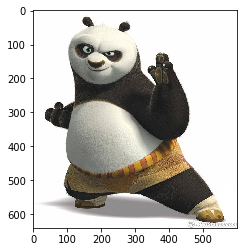

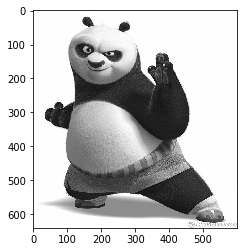

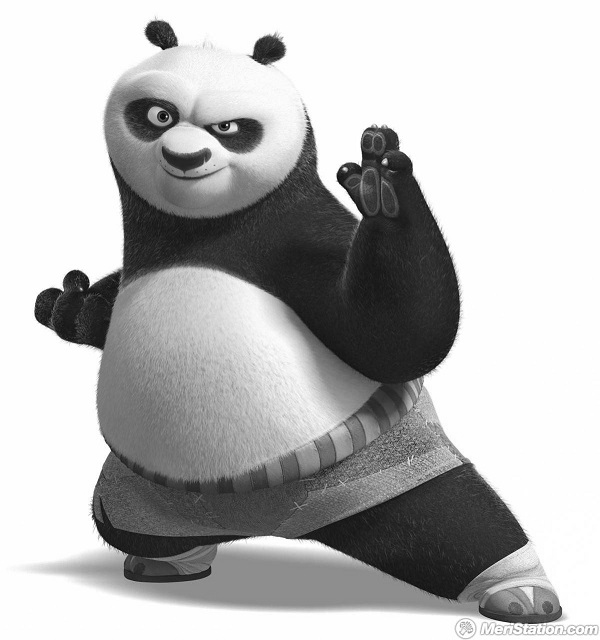

In [66]:
def image_gray(image):
    # tomando el valor estándar NTSC para la iluminusidad en las imagenes
    return [round((0.29894 * image[x][0]) + (0.58704 * image[x][1]) + (0.11402 * image[x][2])) for x in range(len(image))]

# funcion para normalizar/Escalar la imagen ya que los valores de la imagen convulacionada sobrepasan el maximo
def normalizar_image(image, umbral=130): #umbral por default 130
    maxEscala = 255 #valor maximo en el pixel (A)
    minimo_val = image.min()
    maximo_val = image.max()
    ceros_matrix = np.zeros((image.shape))
    
    for fila in range(image.shape[0]):
        for columna in range(image.shape[1]):
            #tempo = np.floor((image[fila,columna]+maximo_val)* maxEscala/(maximo_val-minimo_val))
            tempo = (maxEscala/(maximo_val-minimo_val))*(image[fila,columna]-(minimo_val))
            tempo = tempo if (tempo > umbral) else 0 #reajustar para que se negro o blanco
            ceros_matrix[fila,columna]= tempo # se le asigna el reajuste de valor
    return ceros_matrix.astype(np.uint8)

pandaImage = Image.open('KungFuPanda.png')
pandaData=pandaImage.getdata()
#print(pandaData)
imageSize=pandaImage.size
pandaColor=np.array(pandaImage)
plt.imshow(pandaColor)
plt.show()

grises=image_gray(pandaData)
pandaImage.close()
pandaGris = Image.new('L', imageSize)
pandaGris.putdata(grises)
pandaGris.save('KungFuPandaGray2.png')
#pandaGris.show()
#print(grises)
pandaImage = Image.open('KungFuPandaGray2.png')
pandaData = np.array(pandaImage)
plt.imshow(pandaData, cmap='gray')
plt.show()
Image.fromarray(pandaData)


Filtro Horizontal Prewitt

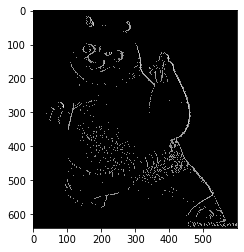

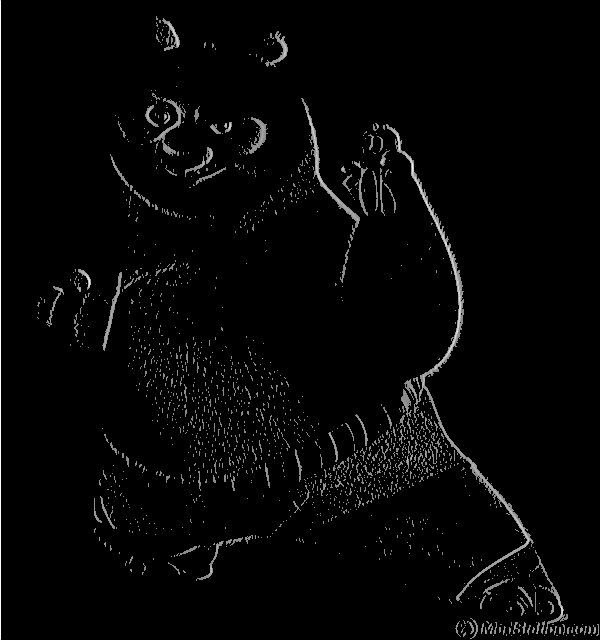

In [67]:
prewitt_x=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
panda_prewitt_x = matrix_convolucion(pandaData,prewitt_x)
panda_normalizado=normalizar_image(panda_prewitt_x,135)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)


Filtro Vertical Prewitt

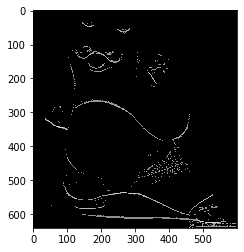

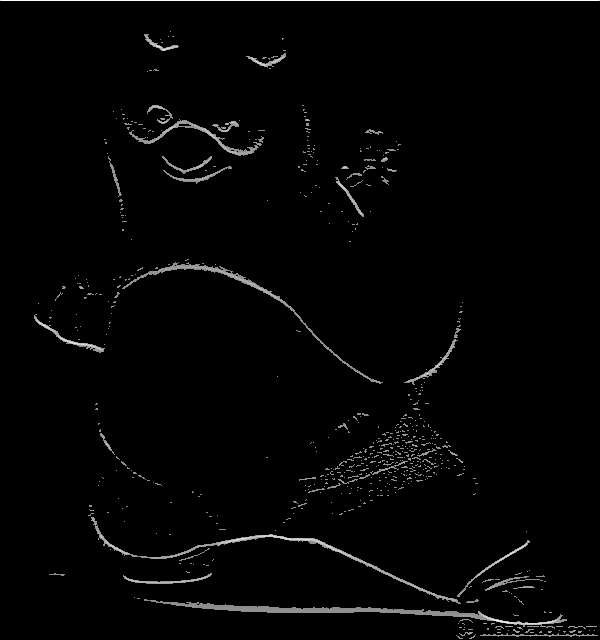

In [68]:
# otra forma de hacerlo
prewitt_y=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
panda_ceros=borde_ceros(pandaData,prewitt_y)
#print(panda_ceros.shape)
panda_prewitt_y=correlacion_cruzada(panda_ceros.shape[0]-2,panda_ceros.shape[1]-2,panda_ceros,rotar_kernel(prewitt_y))
panda_normalizado=normalizar_image(panda_prewitt_y,139)
#print(panda_normalizado)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)

Prewitt en X y Y

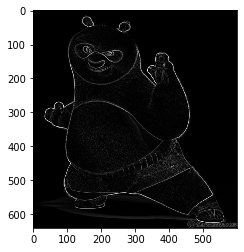

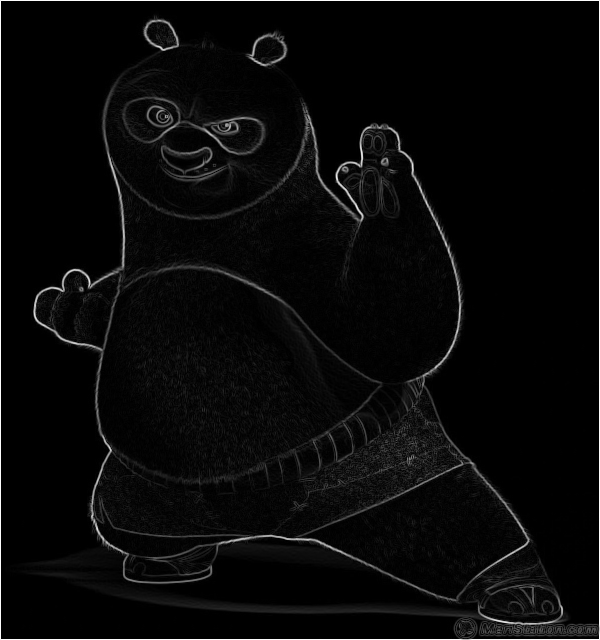

In [69]:
def vector_gradiente(dx,dy):
    image_grad = np.sqrt(np.square(dx)+np.square(dy)) #obtemos el vector gradiente/magnitud de las dos derivadas(X y Y)
    image_grad *= 255.0 / image_grad.max() #normalizamos (esta regla de 3 es mas sencilla)
    return image_grad

panda_prewitt=vector_gradiente(panda_prewitt_x,panda_prewitt_y)
plt.imshow(panda_prewitt, cmap='gray')
plt.show()
Image.fromarray(panda_prewitt.astype(np.uint8))

Filtro Horizontal Sobel

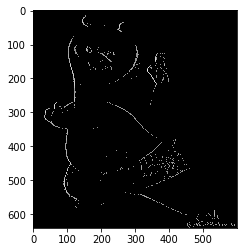

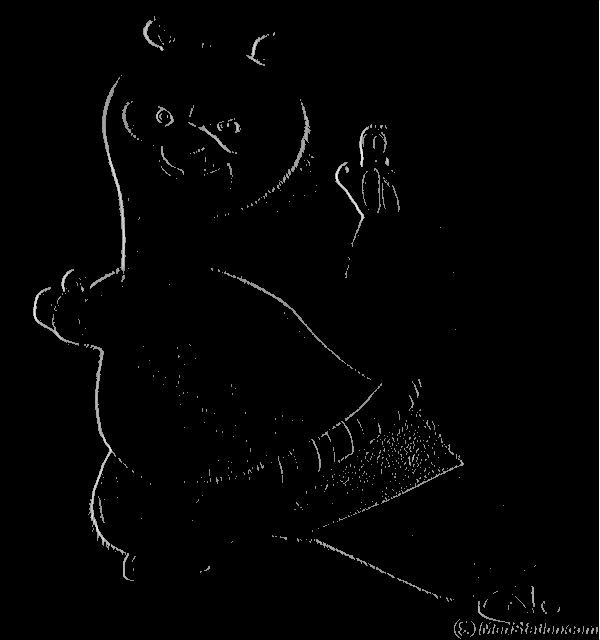

In [70]:
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
panda_sobel_x = matrix_convolucion(pandaData,sobel_x)
panda_normalizado=normalizar_image(panda_sobel_x,140)
#print(panda_normalizado)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)

Filtro Vertical Sobel

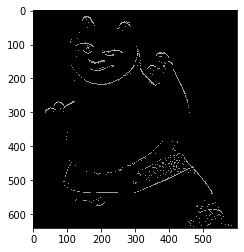

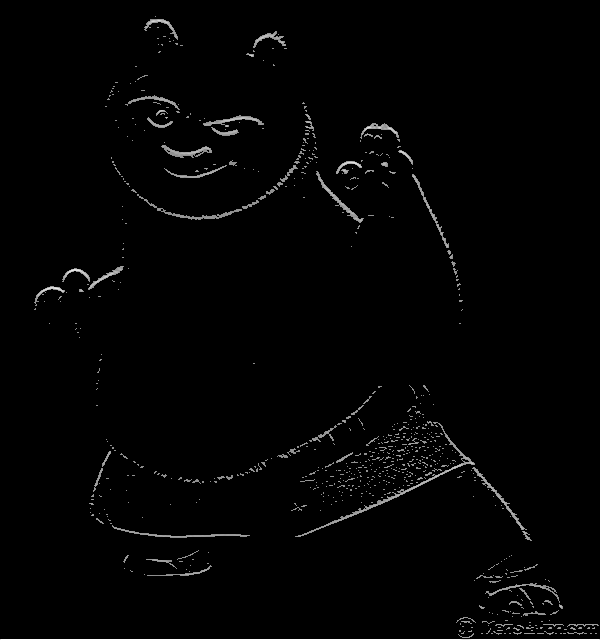

In [71]:
sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
panda_sobel_y=matrix_convolucion(pandaData,sobel_y)
panda_normalizado=normalizar_image(panda_sobel_y,140)
#print(panda_normalizado)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)

Sobel X y Y vector gradiente

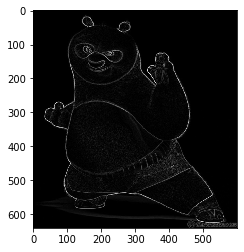

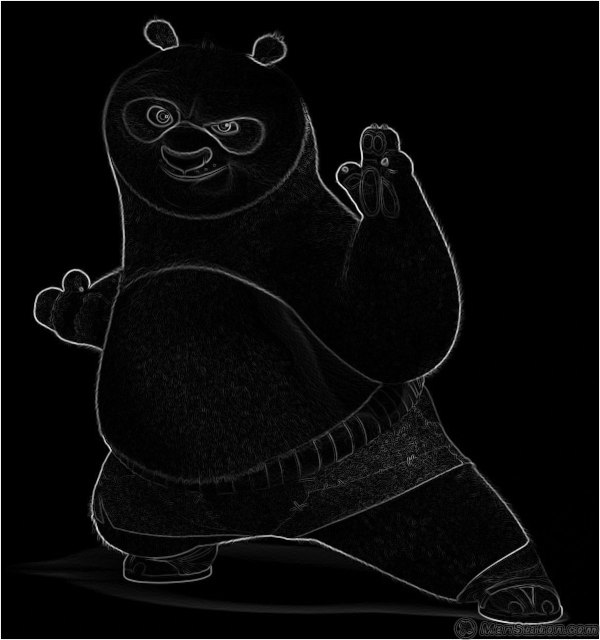

In [72]:
panda_sobel=vector_gradiente(panda_sobel_x,panda_sobel_y)
plt.imshow(panda_sobel, cmap='gray')
plt.show()
Image.fromarray(panda_sobel.astype(np.uint8))

Filtro Horizontal Scharr

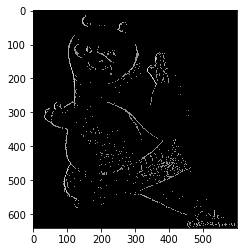

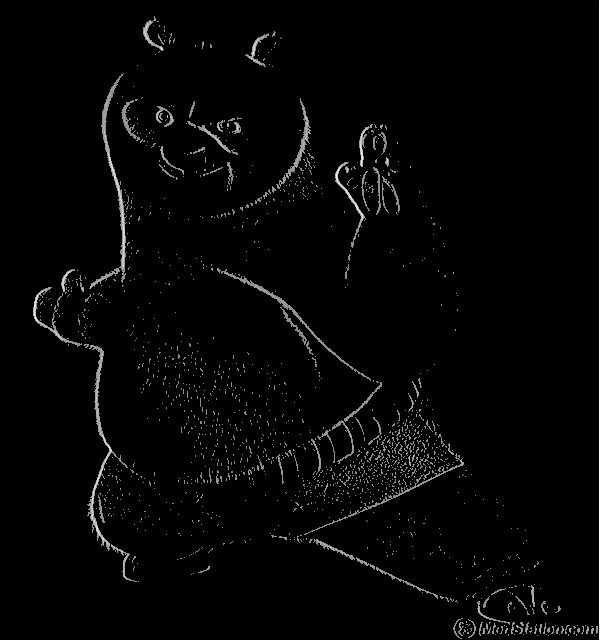

In [73]:
scharr_x=np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
panda_scharr_x=matrix_convolucion(pandaData,scharr_x)
panda_normalizado=normalizar_image(panda_scharr_x,136)
#print(panda_normalizado)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)

Filtrado Vertical Scharr

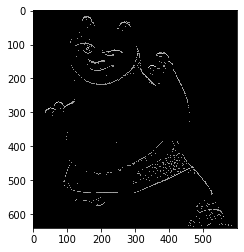

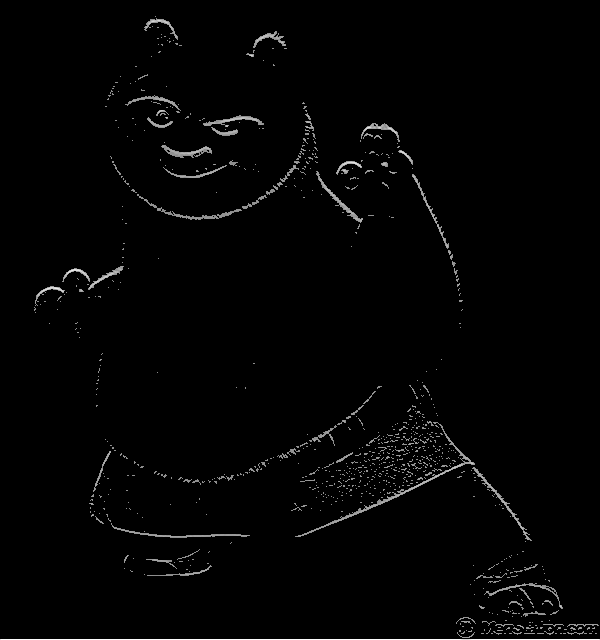

In [74]:
scharr_y=np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
panda_scharr_y=matrix_convolucion(pandaData,scharr_y)
panda_normalizado=normalizar_image(panda_scharr_y,140)
#print(panda_normalizado)
plt.imshow(panda_normalizado, cmap='gray')
plt.show()
Image.fromarray(panda_normalizado)

Scharr X y Y vector gradiente

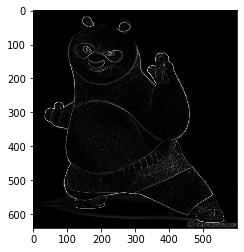

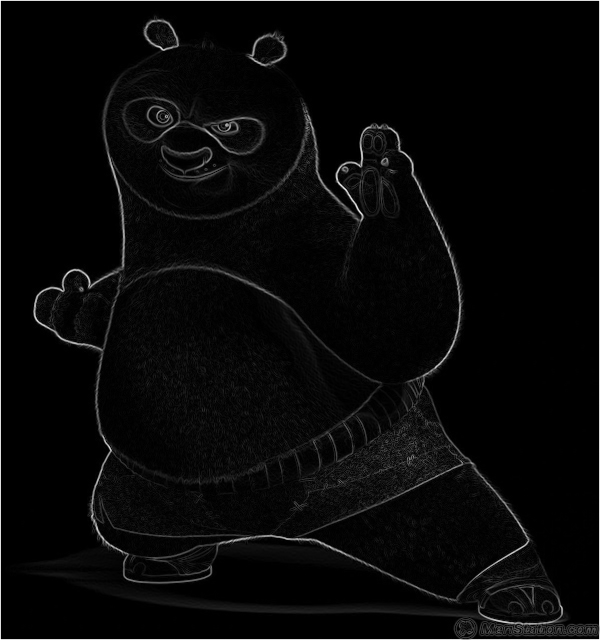

In [75]:
panda_scharr=vector_gradiente(panda_scharr_x,panda_scharr_y)
plt.imshow(panda_scharr, cmap='gray')
plt.show()
Image.fromarray(panda_scharr.astype(np.uint8))

Angulo del Gradiente - Usando Sobel

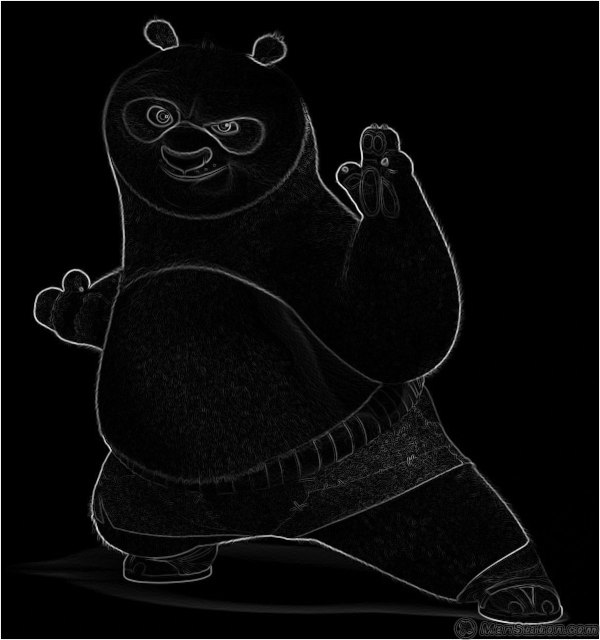

In [76]:
def angulo_gradiente(kernel, image_h,obtener_grados=False): # en esta funcion queda todo junto, convoluciones, vectorgradiente y angulo
    dx = matrix_convolucion(image_h,kernel)
    dy = matrix_convolucion(image_h,kernel.T)#usamos .T para transponer el kernel y no tener que pasarle tambien el kernel en y
    vg = np.sqrt(np.square(dx)+np.square(dy)) #obtemos el vector gradiente/magnitud de las dos derivadas(X y Y)
    vg *= 255.0 / vg.max() #normalizamos (encontramos esta otra forma)
    direccion = np.arctan2(dy,dx)

    if obtener_grados:
        direccion = np.rad2deg(direccion)
        direccion += 180
        return vg,direccion
    return vg

anguloGradiente =angulo_gradiente(sobel_x,pandaData,False)
Image.fromarray(anguloGradiente.astype(np.uint8))



Suavizar (disminucion de ruido)

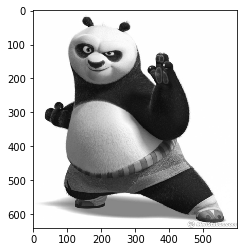

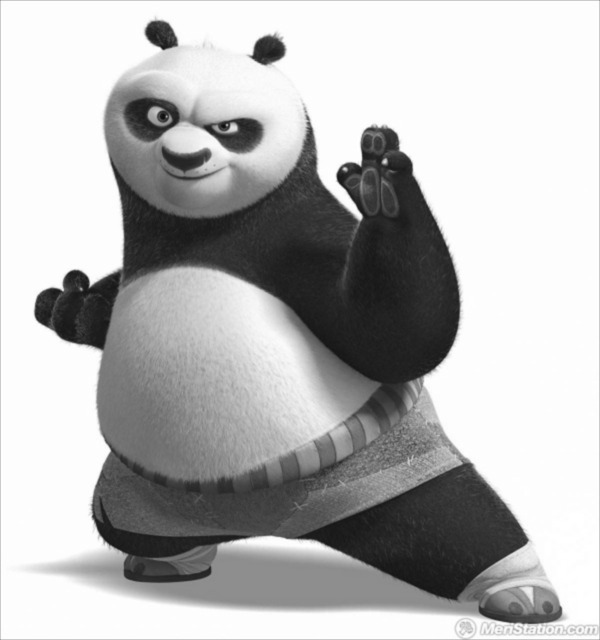

In [77]:
def suavizar(image_h):
    kernel = np.array([[1,3,1],[3,9,3],[1,3,1]]) #kernel Gaussian blur
    return angulo_gradiente(kernel,image_h)

panda_gaussian_blur=suavizar(pandaData)
plt.imshow(panda_gaussian_blur, cmap='gray')
plt.show()
Image.fromarray(panda_gaussian_blur.astype(np.uint8))


Despues de suavizar aplicamos el Kernel Sobel para ver la diferencia con suavizado: se notan mucho menos las rayitas del pantalon

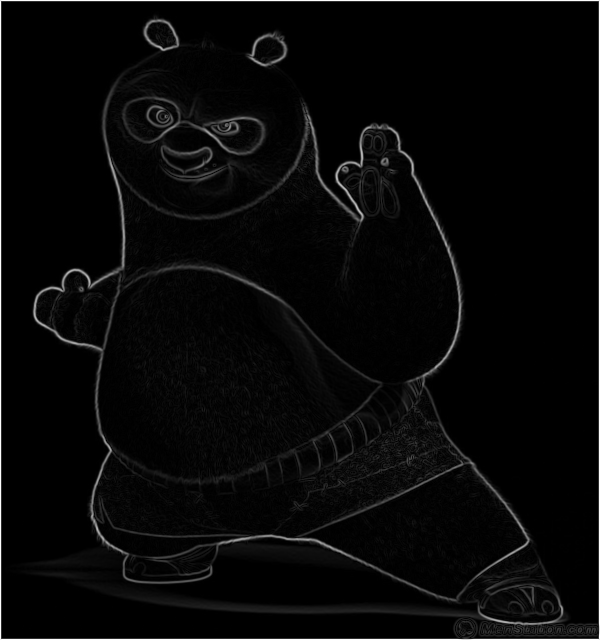

In [78]:
anguloGradiente =angulo_gradiente(sobel_x,panda_gaussian_blur,False)
Image.fromarray(anguloGradiente.astype(np.uint8))

Canny
c)Utiliza alguna de las librerías deseadas para implementar el método de Canny para la detección de bordes.

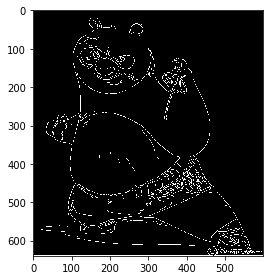

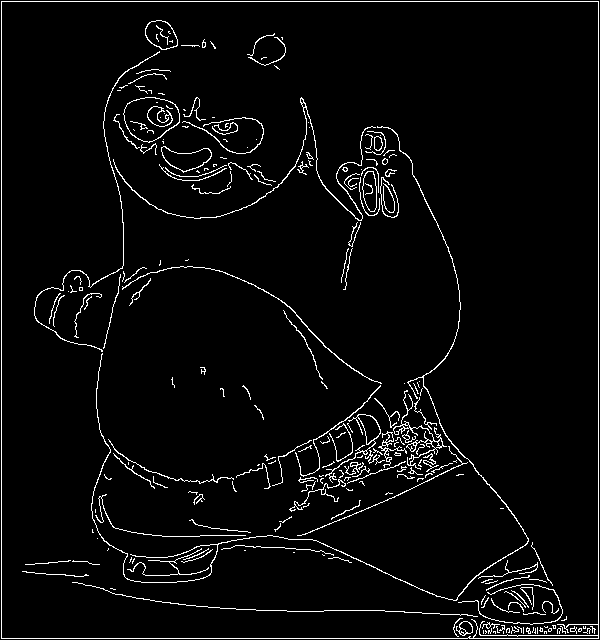

In [79]:
from skimage import io
from skimage import feature
 
edges = feature.canny(panda_gaussian_blur.astype(np.uint8))
io.imshow(edges)
io.show()
#plt.imshow(edges,cmap='gray')
#plt.show()
Image.fromarray(edges)

d) Dibujar los vectores gradientes

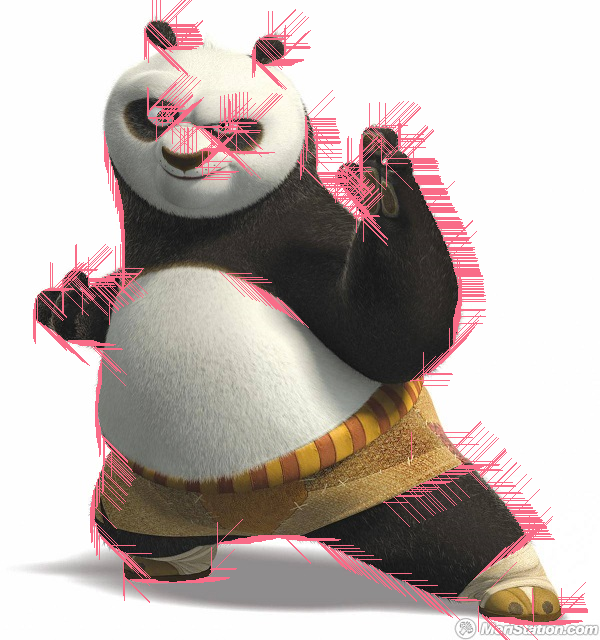

In [80]:
def angulo(ang, size=25):
    if ang < 0 : ang = 360 + ang
    
    if (ang < 20): return (-size,0) #0 deg
    elif (ang < 65): return (-size,+size) # 45 deg
    elif (ang < 110): return (0, +size) # 90 deg
    elif (ang < 155): return (+size, +size) # 135 deg
    elif (ang < 200): return (+size, 0) # 180 deg
    elif (ang < 245): return (+size, size) # 225 deg
    elif (ang < 290): return (0, size) # 270 deg
    elif (ang < 335): return (-size, -size) # 315 deg
    else: ang = 0
        
def drawGradients(image_h, image_vg, image_direc , tam = 4, umbral=70):
    img_draw = ImageDraw.Draw(image_h)
    
    image_vg = image_vg.astype(np.uint8)
    image_direc = image_direc.astype(np.uint8)
    f,c = image_vg.shape
    
    cont = 0
    for fila in range(2, f-2):
        for columna in range(2, c-2):
            if(image_vg[fila, columna] > umbral):
                if(cont == tam):
                    angulo_fila, angulo_columna = angulo(image_direc[fila,columna]) 
                    img_draw.line([(columna, fila), (columna + angulo_columna, fila + angulo_fila)] , fill="#F96C88", width=1)
                    cont=0
                cont+=1
    return image_h

imagenGradiente =angulo_gradiente(sobel_x,panda_gaussian_blur,True)
color_panda = Image.open("KungFuPanda.png")
drawGradients(color_panda, imagenGradiente[0], imagenGradiente[1]) #imagen original a color,vector gradientes, direccion gradientes